# Lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sys
import os
import glob

In [2]:
if sys.platform=='win32':
    !dir .\
        
elif sys.platform=='linux':
    !ls ./

 O volume na unidade C ‚ OS
 O N£mero de S‚rie do Volume ‚ C498-8BF5

 Pasta de C:\Users\caanp\Documents\repositories\ML-anti-fraud\notebooks

10/09/2022  23:28    <DIR>          .
10/09/2022  05:09    <DIR>          ..
10/09/2022  23:28    <DIR>          .ipynb_checkpoints
10/09/2022  23:19            39.593 1.EA.ipynb
               1 arquivo(s)         39.593 bytes
               3 pasta(s)   403.917.275.136 bytes dispon¡veis


In [3]:
pd

<module 'pandas' from 'c:\\Users\\caanp\\miniconda3\\envs\\venv_ml\\lib\\site-packages\\pandas\\__init__.py'>

# Reading

In [4]:
## para saber en que directório uno se encuentra
#
if sys.platform=='win32':
    !echo %cd%
        
elif sys.platform=='linux':
    !pwd

C:\Users\caanp\Documents\repositories\ML-anti-fraud\notebooks


In [5]:
if sys.platform=='win32':
    df = pd.read_csv('.\..\data\dados.csv')
        
elif sys.platform=='linux':
    df = pd.read_csv('./../data/dados.csv')

In [6]:
df.shape

(150000, 20)

# EA

In [7]:
def missing_zeros(df):
    
    """
    Retorna o número de linhas, zeros, nulos das colunas e a cardinalidade delas
    
        df:= Dataframe de pandas que será usado para o cálculo
    
    """
    ## counting missing or empty values in columns
    nulls_blanks = pd.DataFrame(df.isna().sum() + (df.apply(lambda x: x.astype(str).str.strip())=='').sum()).reset_index(drop = False)
    nulls_blanks.columns = ['Columns','T_missing']
    ## Counting distinct values  in columns
    cardinality = pd.DataFrame( df.nunique() ).reset_index(drop = False)
    cardinality.columns = ['Columns','Cardinality']
    ## add total rows
    cardinality['T_rows'] = df.shape[0]
    cardinality = cardinality[['Columns','T_rows','Cardinality']]
    ## counting zeros in Dataframe  in columns
    zeros =  pd.DataFrame( ( df.apply( lambda x: x.astype(str).str.strip() if x.dtypes == float else x  )=='0'  ).sum() + ( df.apply( lambda x: x.astype(str).str.strip() if x.dtypes != float else x  )==0  ).sum() ).reset_index(drop = False)
    zeros.columns = ['Columns','T_zeros']
    ## Extraindo o formato das colunas
    format = pd.DataFrame(df.dtypes).reset_index(drop=False)
    format.columns = ['Columns','Type']
    format

    df_EA = format.merge(cardinality, on='Columns' ).merge(nulls_blanks , on='Columns').merge(zeros, on='Columns')


    df_EA["%_missing"] = 100*(round( df_EA["T_missing"]/df.shape[0],5 ) )
    df_EA["%_zeros"] = 100*(round( df_EA["T_zeros"]/df.shape[0] ,5 ) )


    return df_EA

In [8]:
missing_zeros(df)


,Columns,Type,T_rows,Cardinality,T_missing,T_zeros,%_missing,%_zeros
0,a,int64,150000,4,0,0,0.000,0.000
1,b,float64,150000,7672,12984,472,8.656,0.315
2,c,float64,150000,135090,12984,0,8.656,0.000
3,d,float64,150000,51,365,786,0.243,0.524
4,e,float64,150000,43208,0,65055,0.000,43.370
5,f,float64,150000,1338,11,25390,0.007,16.927
6,g,object,150000,51,194,0,0.129,0.000
7,h,int64,150000,59,0,0,0.000,0.000
8,i,object,150000,127804,0,0,0.000,0.000
9,j,object,150000,8324,0,0,0.000,0.000


In [9]:
os.system("echo %cd%")

0

In [14]:
sys.get

<module 'sys' (built-in)>

In [17]:
from IPython import get_ipython
get_ipython()

In [18]:
DD = get_ipython()

In [ ]:
DD.

In [175]:
df.query("m!=m").ipynb_checkpoints/

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,fecha,monto,score,fraude
87,1,0.8619,3295867.67,NaN,0.0599985463707723,0,BR,0,Pneu Cooper Classic Tour 185/65 R14 86t,cat_feb8e6e,0.20996724658513699,183,NaN,1,Y,N,2020-03-22 12:38:55,174.30,76,1
517,4,NaN,NaN,NaN,0.3818000000000000,0,AR,47,Cubresillon Manta Rustica Pie De Cama Country ...,cat_2025f68,0.32947856738410053,1375,NaN,1,NaN,N,2020-03-09 19:20:53,8.83,94,0
854,2,0.6636,626419.37,NaN,0.0000000000000000,9,AR,33,Adaptador Bluetooth Receptor 4.0 Usb + Musica ...,cat_c90f50b,0.0034732884964192579,1156,NaN,1,Y,N,2020-04-15 11:18:02,5.38,76,0
1174,4,0.7145,101659.22,NaN,0.2278734195299664,0,BR,16,Kit 4 Bermudas Jeans Alta Qualidade Masculina ...,cat_9eff754,0.58312852423031103,0,NaN,0,N,N,2020-03-20 13:06:57,28.67,80,1
1477,4,0.7132,146544.54,NaN,0.0840514948398765,30,BR,3,"Kit Conversor Digital Tv + Antena Hdtv 4,3m Pr...",cat_86555b5,0.82244332069394233,1315,NaN,1,NaN,N,2020-03-31 14:38:59,18.50,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147817,2,0.7355,10850.13,NaN,0.0000000000000000,81,BR,7,1 Painel Placa Energia Solar Fotovoltaica 370w...,cat_5bbd5cc,0.55510560581071289,3074,NaN,1,N,N,2020-03-26 18:24:40,153.57,81,0
148492,2,0.6212,1563.34,NaN,0.0000000000000000,77,AR,19,Obras Completas Shakespeare Tomo1 Bilingüe,cat_3203c7c,0.58009001049140352,1791,NaN,1,NaN,N,2020-04-04 12:21:25,5.51,66,0
148603,4,0.6823,145749.90,NaN,0.0000000000000000,11,AR,48,Funda Cubre Auto Cobertor Coche Antigranizo Pr...,cat_8f79ecb,0.91382470754399492,3076,NaN,1,Y,N,2020-04-17 19:41:32,103.31,48,0
149710,4,0.7109,3984.09,NaN,0.0000000000000000,0,BR,32,14 Gravatas Semi - Marsala Fosco E 3 Borboleta...,cat_1d0fa67,0.52478155098475909,2743,NaN,0,N,N,2020-04-05 22:15:41,25.92,44,0


In [154]:
)df.loc[df['fraude']==1,'score'].plot(kind='hist', bins=100)

SyntaxError: unmatched ')' (4146889301.py, line 1)

<AxesSubplot:ylabel='Frequency'>

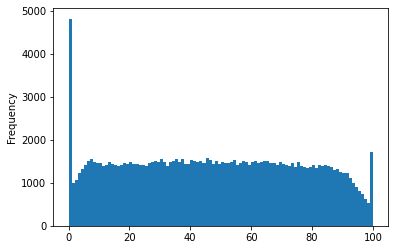

In [75]:
df.loc[df['fraude']==0,'score'].plot(kind='hist', bins=100)